In [15]:
from conx import Network, Layer, Conv2DLayer, MaxPooling2DLayer, FlattenLayer

In [2]:
net = Network("MNIST")
net.add(Layer("input", shape=784, vshape=(28, 28), colormap="hot", minmax=(0,1)))
net.add(Layer("hidden1", shape=512, vshape=(16,32), activation='relu', dropout=0.2))
net.add(Layer("hidden2", shape=512, vshape=(16,32), activation='relu', dropout=0.2))
net.add(Layer("output", shape=10, activation='softmax'))

net.connect('input', 'hidden1')
net.connect('hidden1', 'hidden2')
net.connect('hidden2', 'output')

In [3]:
net.compile(loss='mean_squared_error',
            optimizer='sgd')

In [4]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

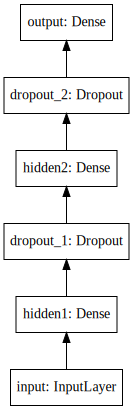

In [5]:
SVG(model_to_dot(net.model, rankdir="BT").create_svg())

In [6]:
net.load_keras_dataset('mnist')
net.rescale_inputs((0,255), (0,1), 'float32')
#net.shuffle_dataset()
net.reshape_inputs(784)
net.split_dataset(100)
net.set_targets_to_categories(10)
net.summary_dataset()

Loading mnist dataset...
70000 train inputs, 0 test inputs
Set 70000 inputs and targets
Input data shape: (28, 28), range: (0, 255), type: uint8
No targets
Inputs rescaled to float32 values in the range 0 - 1
Input data shape: (784,), range: (0.0, 1.0), type: float32
Split dataset into:
   100 train inputs
   69900 test inputs
Generated 70000 target vectors from labels
100 train inputs, 69900 test inputs
Set 70000 inputs and targets
Input data shape: (784,), range: (0.0, 1.0), type: float32
Target data shape: (10,), range: (0, 0), type: uint8


In [7]:
widget = net.make_widget()

<IPython.core.display.Javascript object>

In [8]:
widget

In [10]:
net.train(1000, report_rate=5, verbose=0)
#net.test()

(1100, 0.089496821165084839, 0.11999999731779099, 0.0)

In [13]:
import time
for i in range(10):
    net.propagate(net.get_input(i))
    time.sleep(1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [41]:
K.image_data_format() 

'channels_last'

In [49]:
net = Network("MNIST-CNN")
net.add(Layer("input", shape=(28,28), vshape=(28, 28), colormap="hot", minmax=(0,1)))
net.add(Conv2DLayer("Conv2D-1", 16, (5,5), activation="relu"))
net.add(MaxPooling2DLayer("maxpool1", (2,2)))
net.add(Conv2DLayer("Conv2D-2", 132, (5,5), activation="relu")) 
net.add(MaxPooling2DLayer("maxpool2", (2,2)))
net.add(FlattenLayer("flatten"))
net.add(Layer("hidden", shape=1000, activation='relu'))
net.add(Layer("output", shape=10, activation='softmax'))

net.connect()

In [50]:
net.compile(loss="binary_crossentropy", optimizer="rmsprop")

ValueError: Input 0 is incompatible with layer Conv2D-1: expected ndim=4, found ndim=3

In [46]:
import keras
import keras.backend as K
from keras.datasets import mnist

In [47]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [48]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [27]:
net.inputs[0].shape

(28, 28)

In [33]:
import os
import gzip
import pickle

directory = "../examples"

with gzip.open(os.path.join(directory, 'mnist.pkl.gz'), 'rb') as f:
    try: # Python3
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        data = u.load()
    except: # Python2
        data = pickle.load(f)
    train_set, validation_set, test_set = data


In [38]:
train_set[0].shape

(50000, 784)

In [ ]:
#net.rescale_inputs((0,255), (0,1), 'float32')
#net.shuffle_dataset()
net.reshape_inputs(784)
net.split_dataset(100)
net.set_targets_to_categories(10)
net.summary_dataset()